# MSE 5720: Homework 4
## Hanfeng Zhai
### NetID: $\tt hz253$
### May 2, 2022



##Introduction

In this homework, we are assigned to compute multiple properties of calcite, including the cell parameters, vibrational modes, the effect of vibrational modes, mode intensities comparisons, etc. In Exercise 1A, the cell parameters are converged by changing the energy cutoff and k point. The convergence started by inputting the given ideal unit cell and applying ```vc-relax``` calculation in Quantum ESPRESSO to relax the structures until the message ```bfgs converged in 1 scf cycles and 0 bfgs steps``` popped up. During the process, the values of $\tt celldm(1)$ and $\tt celldm(4)$ is recorded and plotted. The optimized structure is plotted in VESTA in Exercise 1B. In Exercise 2A, the zone-center vibrational modes were calculated based on the output from the zone-center phonon dispersion. The computed vibrational intensities are thence listed in a table and compared with literature values. In Exercise 3A, five different disordered structures are generated based on a normal distribution of variation of $5^{\rm o}$, and the corresponding $a$ and $c$ are computed based on the given equation. In exercise 3B, the phonon frequencies at the zone center are computed following Exercise 2A. The data of three degrees' disordered structures considering different rhombohedral angles are plotted in Exercise 3C. Based on the provided python script, the ratio of peak intensities for $\nu_2/\nu_3$ and $\nu_4/\nu_3$ are computed considering the definition of the three different intensities in the instructions in Exercise 4A. The relation between $\nu_2/\nu_3$ and $\nu_4/\nu_3$ were plotted in dots, where $\nu_4$ and $\nu_2$ exhibits a position correlation.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
from datascience import Table
import scipy
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


##Exercise 1: Optimization of the lattice parameters and atomic positions of calcite

###Exercise 1A

*Converge all structural parameters of calcite with respect to the plane wave cutoff and k-point grid. Compare your final converged result to both experiment and other calculations in the literature (**try to compare with results from DFT calculations that have used the same exchange-correlation functional that you have used**).*

We first converge the cutoff energy: considering converging the energy cutoff, an initial value of 20 Ry is first employed with $\tt celldm(1)=12$ and $\tt celldm(4)=0.5$, with a fixed k points of 9; considering the k points, an initial value of 2 is employed with a fixed energy cutoff of 70 Ry. With the given initial converging parameters, a ```vc-relax``` calculation was performed to obtain the relaxed ```celldm(1)``` and ```celldm(4)```, and the corresponding atomistic coordinates. Then the optimized cell parameters were put to the new script with an increasing energy cutoff for a new ```vc-relax``` calculation. Following this procedure, the converged energy is 70 Ry, and the converged k point is 6. The corresponding ```celldm(1)``` and ```celldm(4)``` were plotted. The convergence was verified as the output says ```bfgs converged in 1 scf cycles and 0 bfgs steps```. The converged values of $a$ and $c$ were compared with literature values from both experiments and first-principle calculation using the PBE pseudopotential.

In [ ]:
# ener_Q1_a = np.array([12.1672,12.1839,11.8377,12.1720,12.1594,12.1691])
ener_Q1_a = np.array([12.1839,11.8377,12.1720,12.1594,12.1691,12.1817,12.1714,12.1750])
ener_Q1_c = np.array([0.6938,0.6845,0.6933,0.6926,0.6927,0.6935,0.6931,0.6935])
ener_list = np.array([20,30,40,50,60,70,80,90])
a_diff_ener = np.abs([ener_Q1_a[1]-ener_Q1_a[0],ener_Q1_a[2]-ener_Q1_a[1],ener_Q1_a[3]-ener_Q1_a[2],ener_Q1_a[4]-ener_Q1_a[3],\
                      ener_Q1_a[5]-ener_Q1_a[4],ener_Q1_a[6]-ener_Q1_a[5],ener_Q1_a[7]-ener_Q1_a[6]])
c_diff_ener = np.abs([ener_Q1_c[1]-ener_Q1_c[0],ener_Q1_c[2]-ener_Q1_c[1],ener_Q1_c[3]-ener_Q1_c[2],ener_Q1_c[4]-ener_Q1_c[3],\
                      ener_Q1_c[5]-ener_Q1_c[4],ener_Q1_c[6]-ener_Q1_c[5],ener_Q1_c[7]-ener_Q1_c[6]])
ener_point_diff = np.arange(30,100,10)
ener_point = np.arange(20,100,10)

Text(0, 0.5, 'celldm(4) [-]')

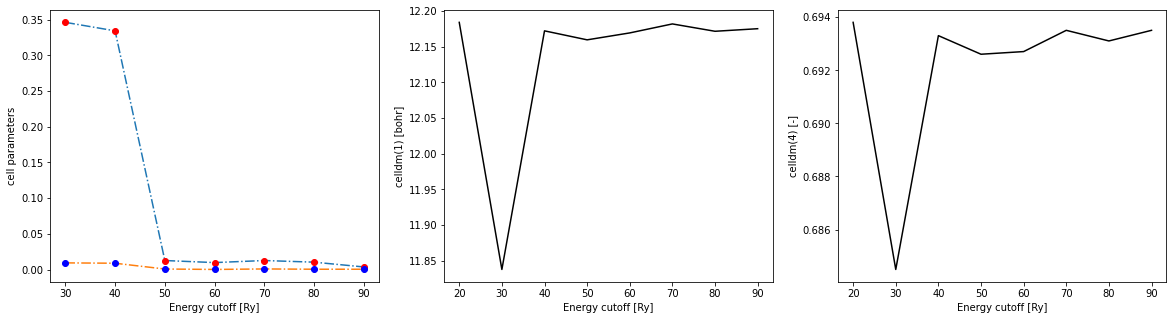

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(ener_point_diff, a_diff_ener, '-.')
axs[0].plot(ener_point_diff, a_diff_ener, 'ro')
axs[0].plot(ener_point_diff, c_diff_ener, '-.')
axs[0].plot(ener_point_diff, c_diff_ener, 'bo')
axs[0].set_xlabel('Energy cutoff [Ry]')
axs[0].set_ylabel('cell parameters')
# axs[0].set_yscale('log')
axs[1].plot(ener_point, ener_Q1_a,'k')
axs[1].set_xlabel('Energy cutoff [Ry]')
axs[1].set_ylabel('celldm(1) [bohr]')
axs[2].plot(ener_point, ener_Q1_c,'k')
axs[2].set_xlabel('Energy cutoff [Ry]')
axs[2].set_ylabel('celldm(4) [-]')

From the above figures, one can conclude that at 70 Ry both the cell parameters have a low fluctuation.

In [ ]:
k_Q1_a = np.array([12.1620,12.1740,12.1690,12.1669,12.1641,12.1625])
k_Q1_c = np.array([0.6923,0.6934,0.6928,0.6926,0.6927,0.6925])
k_list = np.array([2,3,4,5,6,7,8,9,10])
a_diff_k = np.abs([k_Q1_a[1]-k_Q1_a[0],k_Q1_a[2]-k_Q1_a[1],k_Q1_a[3]-k_Q1_a[2],k_Q1_a[4]-k_Q1_a[3],k_Q1_a[5]-k_Q1_a[4]])
c_diff_k = np.abs([k_Q1_c[1]-k_Q1_c[0],k_Q1_c[2]-k_Q1_c[1],k_Q1_c[3]-k_Q1_c[2],k_Q1_c[4]-k_Q1_c[3],k_Q1_c[5]-k_Q1_c[4]])
k_point_diff = np.arange(3,8,1)
k_point = np.arange(2,8,1)

Text(0, 0.5, 'celldm(4) [-]')

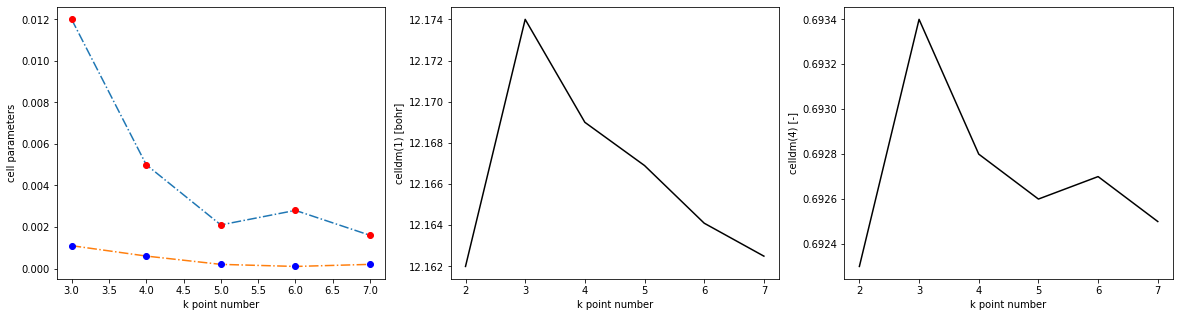

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (20, 5))
axs[0].plot(k_point_diff, a_diff_k, '-.')
axs[0].plot(k_point_diff, a_diff_k, 'ro')
axs[0].plot(k_point_diff, c_diff_k, '-.')
axs[0].plot(k_point_diff, c_diff_k, 'bo')
axs[0].set_xlabel('k point number')
axs[0].set_ylabel('cell parameters')
axs[1].plot(k_point, k_Q1_a,'k')
axs[1].set_xlabel('k point number')
axs[1].set_ylabel('celldm(1) [bohr]')
axs[2].plot(k_point, k_Q1_c,'k')
axs[2].set_xlabel('k point number')
axs[2].set_ylabel('celldm(4) [-]')

From the above figures, one can conclude that at k points of 6 both the cell parameters also have a relatively low fluctuation.

In [ ]:
!wget https://hanfengzhai.net/data/MSE5720/cco.6.k.out https://hanfengzhai.net/data/MSE5720/cco.70.ener.out

--2022-05-11 20:42:15--  https://hanfengzhai.net/data/MSE5720/cco.6.k.out
Resolving hanfengzhai.net (hanfengzhai.net)... 185.199.110.153
Connecting to hanfengzhai.net (hanfengzhai.net)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145397 (142K) [application/octet-stream]
Saving to: ‘cco.6.k.out’

cco.6.k.out         100%[===================>] 141.99K  --.-KB/s    in 0.003s  

2022-05-11 20:42:15 (51.4 MB/s) - ‘cco.6.k.out’ saved [145397/145397]

--2022-05-11 20:42:15--  https://hanfengzhai.net/data/MSE5720/cco.70.ener.out
Reusing existing connection to hanfengzhai.net:443.
HTTP request sent, awaiting response... 200 OK
Length: 568024 (555K) [application/octet-stream]
Saving to: ‘cco.70.ener.out’

cco.70.ener.out     100%[===================>] 554.71K  --.-KB/s    in 0.004s  

2022-05-11 20:42:16 (153 MB/s) - ‘cco.70.ener.out’ saved [568024/568024]

FINISHED --2022-05-11 20:42:16--
Total wall clock time: 0.3s
Downloaded: 2 files, 697K in 0.006

To show that 70 Ry and k points of 6 are indeed the converged parameters, verification are conducted based on the output files.

In [ ]:
!awk '/bfgs converged/' cco.6.k.out cco.70.ener.out

     bfgs converged in   1 scf cycles and   0 bfgs steps
     bfgs converged in   1 scf cycles and   0 bfgs steps


Comparing with literature values from both experiments [2] and PBE DFT computation [5], one can conclude that the optimized values have a good accuracy, with relative errors of 0.5277% & 1.7240%, and 0.1486% & 0.8890%, for experiments and DFT computation for $a$ and $c$, respectively.

In [ ]:
constants = ['a [Å]','c [Å]']
# print(modes)
Calculated = [5.04649, 17.24727]
ref_val1 = [5.020, 16.955]
ref_val2 = [5.039, 17.402]
tab_kpoint = Table().with_columns(['Lattice constants', constants,'Calculated', \
                                   Calculated,'Markgraf & Reeder [2]', ref_val1,'Ulian & Valdrè [5]', ref_val2])
tab_kpoint

Lattice constants,Calculated,Markgraf & Reeder [2],Ulian & Valdrè [5]
a [Å],5.04649,5.02,5.039
c [Å],17.2473,16.955,17.402


###Exercise 1B 
*Use VESTA to visualize the structure of calcite and include an image in your report. A well-presented crystal structure makes the main structural features (important bonds, coordination environments) clear.*

The $\tt.cif$ file was generated with the help of Sabrina and Prof. Benedek, from [FINDSYM](https://iso.byu.edu/iso/findsym.php), using the data generated from Quantum ESPRESSO. 


<img src="https://hanfengzhai.net/data/MSE5720/CCO_newest.png" alt=" " width="500"/>

##Exercise 2: Calculation of zone-center vibrational modes of calcite

###Exercise 2A
*Calculate the zone-center vibrational modes for your fully converged and relaxed calcite structure from 1A above, with LO-TO splitting taken into account; perform one calculation with a slightly higher plane wave cutoff and denser k-point grid to ensure that the frequencies are converged.*

The zone-center vibrational modes were calculated from the general calculation of lattice dynamics. A $\tt scf$ calculation is performed first, following a phonon calculation. From the output file of the postprocessing and taking the hint from the homework instructions, the modes were identified as 22, 23, and 27, respectively. The values compared with experimental results are listed in the following table. From the compared results, one conclude that the relative errors $\nu_2$, $\nu_3$ and $\nu_4$ compared with experimental values are 0.4742%, 0.2183%, and 0.0043%, respectively.

In [ ]:
modes = [22,23,27]
nomina = ['ν2','ν3','ν4']
frequency = np.array([686.52, 830.53, 1379.56])
frequency = np.transpose(frequency)
ref_freq = [683.27954,828.72124,1379.50005]
intensity = [0.318, 2.769, 69.3211]
intensity = np.transpose(intensity)
tab_kpoint = Table().with_columns(['',nomina,'Modes', modes,'Intensity', intensity,'Computed Frequency', frequency,'Jiang et al. [6]',ref_freq])
tab_kpoint

,Modes,Intensity,Computed Frequency,Jiang et al. [6]
ν2,22,0.318,686.52,683.28
ν3,23,2.769,830.53,828.721
ν4,27,69.3211,1379.56,1379.5


##Exercise 3: Generation of disordered structures


###Exercise 3A
*Using your fully relaxed structure from above, generate a series of 5 structures with different rhombohedral angles. Select your angles randomly from a Gaussian distribution having a mean of your fully relaxed angle and a standard deviation of 5$^\rm o$. Modify the lattice parameter to keep the volume constant.*

In this problem, I generate the five disordered structures using [Random.org](https://www.random.org/gaussian-distributions/), where the five generated structures have the angles in degrees of:

$$
\tt 
5.2468196310e+1\quad\quad 5.0286408940e+1 \quad\quad 4.8153928810e+1\quad\quad 4.9138106410e+1\quad\quad 5.0112695360e+1
$$

Convert those disordered angles into $\tt rad$ and compute the corresponding ```celldm(1)``` and ```celldm(4)```, based on the given equation 

$$
V = a^3 (1 - \cos\gamma ) \times \sqrt{(1+2\cos\gamma)} 
$$

The five correponding cell parameters are listed in the following table:



In [ ]:
para = ['celldm(1)','celldm(4)']
val1 = [11.3568, 0.6092]
val2 = [11.3568, 0.6390]
val3 = [11.8795, 0.6671]
val4 = [11.7517, 0.6542]
val5 = [11.6303, 0.6413]
intensity = np.transpose(intensity)
tab_kpoint = Table().with_columns(['Cell parameters', para, 'Structure 1', val1, 'Structure 2', val2, \
                                   'Structure 3', val3, 'Structure 4',val4, 'Structure 5',val5])
tab_kpoint

Cell parameters,Structure 1,Structure 2,Structure 3,Structure 4,Structure 5
celldm(1),11.3568,11.3568,11.8795,11.7517,11.6303
celldm(4),0.6092,0.639,0.6671,0.6542,0.6413


###Exercise 3B
*Calculate the frequencies of the phonons at the zone center for your distorted structures using the procedure described above.*

The values of the five different calculated frequencies and intensities correpsonding to their modes are listed in the following table.

In [ ]:
modes = [22,23,27]
modes = np.transpose(modes)
# print(modes)
frequency1 = np.array([675.63,823.12,1347.07])
frequency2 = np.array([693.51,824.08,1389.95])
frequency3 = np.array([682.64,828.2,1365.34])
frequency4 = np.array([681.04,826.8,1361.44])
frequency5 = np.array([679.48,825.55,1357.46])
intensity1 = [0.1656,2.3151,71.5828]
intensity2 = [0.3875,2.9795,71.427]
intensity3 = [0.25,2.6683,70.0238]
intensity4 = [0.2278,2.6044,70.4025]
intensity5 = [0.208,2.5319,70.7662]
tab_q3b = Table().with_columns(['Modes', modes,'Frequency (I)', frequency1,'Intensity (I)', intensity1,\
                                   'Frequency (II)', frequency2,'Intensity (II)', intensity2,\
                                   'Frequency (III)', frequency3,'Intensity (III)', intensity3,\
                                   'Frequency (IV)', frequency4,'Intensity (IV)', intensity4,\
                                   'Frequency (V)', frequency5,'Intensity (V)', intensity5])
tab_q3b

Modes,Frequency (I),Intensity (I),Frequency (II),Intensity (II),Frequency (III),Intensity (III),Frequency (IV),Intensity (IV),Frequency (V),Intensity (V)
22,675.63,0.1656,693.51,0.3875,682.64,0.25,681.04,0.2278,679.48,0.208
23,823.12,2.3151,824.08,2.9795,828.2,2.6683,826.8,2.6044,825.55,2.5319
27,1347.07,71.5828,1389.95,71.427,1365.34,70.0238,1361.44,70.4025,1357.46,70.7662


###Exercise 3C
*Using your own data as well as your classmates’, plot the frequencies of the above mentioned modes (involving the $\rm CO_3$ units) as a function of the rhombohedral angle $\gamma$.*

<img src="https://hanfengzhai.net/data/MSE5720/plotq3c_hw4.png" alt=" " height="250"/>

From the plotted figure, one can observe that the data is distributed in a cross-shaped layout, with larger angles of disordered structures having more sparsely distributed points.

##Exercise 4: Comparison of mode intensities between distorted structures

###Exercise 4A
*Use the python script provided to obtain the intensity of the calculated phonon modes for all disordered structures and your fully relaxed perfectly ordered structure. This script calculates the oscillator strength for each mode, which depends on the Born effective charges and phonon eigenvectors. Calculate the ratio of peak intensities for $\nu_2/\nu_3$ and $\nu_4/\nu_3$. You can use arbitrary scaling.*

By running the provided python script for postprocessing the results generated from the phonon calculation, one can compute the intensities corresponding to different frequencies based on ```diel_output.txt```. By plot the curves one can obtain the values of $\nu_2 / \nu_3$ and $\nu_4/\nu_3$ as follows:

<img src="https://hanfengzhai.net/data/MSE5720/hw4q4_long.png" alt=" " width="500"/>

In [ ]:
nomina = ['ν2','ν3','ν4']
freq1 = [823.084,1347.05,674.983]
freq2 = [824.037,1389.96,691.874]
freq3 = [828.077,1365.37,681.637]
freq4 = [826.815,1361.48,680.007]
freq5 = [825.517,1357.54,678.559]
freq0 = [830.714,1379.73,685.179]
tab_q4a = Table().with_columns(['',nomina,'Structure I', freq1,'Structure II', freq2,\
                                   'Structure III',freq3,'Structure IV', freq4,'Structure V', freq5])
tab_q4a

,Structure I,Structure II,Structure III,Structure IV,Structure V
ν2,823.084,824.037,828.077,826.815,825.517
ν3,1347.05,1389.96,1365.37,1361.48,1357.54
ν4,674.983,691.874,681.637,680.007,678.559


Based on the computed values, we can hence obtain the values for $\nu_2/\nu_3$ and $\nu_4/\nu_3$:


In [ ]:
nomina = ['ν2/ν3','ν4/ν3']
freq1_new = [823.084/1347.05,674.983/1347.05]
freq2_new = [824.037/1389.96,691.874/1389.96]
freq3_new = [828.077/1365.37,681.637/1365.37]
freq4_new = [826.815/1361.48,680.007/1361.48]
freq5_new = [825.517/1357.54,678.559/1357.54]
freq0_new = [830.714/1379.73,685.179/1379.73]
tab_q4a_2 = Table().with_columns(['',nomina,'Relaxed Structure', freq0_new,'Structure I', freq1_new,'Structure II', freq2_new,\
                                   'Structure III',freq3_new,'Structure IV', freq4_new,'Structure V', freq5_new])
tab_q4a_2

,Relaxed Structure,Structure I,Structure II,Structure III,Structure IV,Structure V
ν2/ν3,0.602084,0.611027,0.592849,0.606485,0.607291,0.608098
ν4/ν3,0.496604,0.501082,0.497765,0.499232,0.499462,0.499845


###Exercise 4B
*Plot the ratio $\nu_2/\nu_3$ (y-axis) against the ratio $\nu_4/\nu_3$. What can you say about the relationship between these ratios and the degree of disorder in the crystal?*

Text(0, 0.5, '$ν_2/ν_3$')

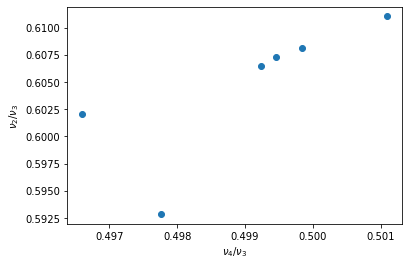

In [ ]:
y_axis = [freq0_new[0],freq1_new[0],freq2_new[0],freq3_new[0],freq4_new[0],freq5_new[0]]
x_axis = [freq0_new[1],freq1_new[1],freq2_new[1],freq3_new[1],freq4_new[1],freq5_new[1]]
plt.scatter(x_axis,y_axis)
plt.xlabel('$ν_4/ν_3$')
plt.ylabel('$ν_2/ν_3$')

Based on the given instructions, and from the computed $\nu_2$, $\nu_3$, and $\nu_4$ from exercise 3, we can hence obtain the values to plot as in the above figure.

From plotting the disordered structures from the Gaussian distribution, we can conclude that with an increasing $\nu_4/\nu_3$, there is an increasing $\nu_2/\nu_3$. In other words, $\nu_4/\nu_3$ and $\nu_2/\nu_3$ are positively correlated. There is a slight "error" for the value of structure 2, as the computed point does not follow the general linear trend. However, the general increasing trend can still be concluded.

##Summary

In this homework, I combined different techniques learnt previously to compute various properties of calcite shown above. Combining the actual theoretical knowledge learnt from lectures with actual applications in Quantum ESPRESSO really helps me possess the details of conducting first-principle calculations of materials. However, I still encountered the following difficulties while doing the homework: 

(1) **Transformation of the coordinates from the primitive cell to the conventional cell.** After the relaxation generated from the ESPRESSO output file, the bfgs optimized structures were expressed in the primitive cell description. Most literature values of the cell parameters were expressed in the conventional cell coordinates. Eventually, with the help of peers (Cheng Wang) I learned that one can obtain the conventional cell parameters from $\tt VESTA$. 


(2) **I was confused by the concept of generating disordered structures with certain degrees of variations.** Initially, I got stuck at randomly selecting angles from a Gaussian distribution having a mean of your fully relaxed angle and a standard deviation of 5$\sf\rm^o$. After Sabrina explained using plots of the normal distribution to illustrate how the generated points (different angles) lie in the distribution range, I then understand the meaning and purpose of this exercise.


(3) **I had a hard time understanding the physical meaning of frequency, mode and intensities.** While doing exercises 2 & 3 for showing the values of $\nu_2$, $\nu_3$, & $\nu_4$ and plotting the data from the class, the physical meaning of frequencies, modes, and intensities was unclear to me. After going back to the course's notes and googling I gained a very general personal understanding of the three concepts: for each mode of vibration, the material displays a specific vibration frequency with a specific intensity. 

Overall, this homework combined many of the previously learned knowledge and in-class theory to help me better understand convergence, structural optimization, vibrational properties, etc. Specifically, the emphasis on vibrational properties in the latter half was challenging for me; and provided me with a decent understanding of the relations between structural disorders and the corresponding vibrational properties.

##References

[1] Andersson, M., Dideriksen, K., Sakuma, H. et al. Modelling how incorporation of divalent cations affects calcite wettability–implications for biomineralisation and oil recovery. Sci Rep 6, 28854 (2016). [10.1038/srep28854](https://doi.org/10.1038/srep28854).

[2] S. A. Markgraf, Richard J. Reeder; High-temperature structure refinements of calcite and magnesite. American Mineralogist 1985;; 70 (5-6): 590–600. [0003-004X/85/0506-0590$02.00](http://www.minsocam.org/ammin/AM70/AM70_590.pdf)

[3] Leo Merrill and William A. Bassett , "Miniature diamond anvil pressure cell for single crystal x‐ray diffraction studies", Review of Scientific Instruments 45, 290-294 (1974) [10.1063/1.1686607](https://doi.org/10.1063/1.1686607).

[4] Joseph R. Smyth, Thomas J. Ahrens. The crystal structure of calcite III. Geophysical Research Letters, Vol. 24, No. 13, P. 1595-1598, [10.1029/97GL01603](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/97GL01603)

[5] Ulian, G., Valdrè, G. Study of the variation of the optical properties of calcite with applied stress, useful for specific rock and material mechanics. Sci Rep 12, 299 (2022). [10.1038/s41598-021-04471-6](https://doi.org/10.1038/s41598-021-04471-6)

[6] Cheng-Lu Jiang, Wei Zeng, Fu-Sheng Liu, Bin Tang, Qi-Jun Liu. First-principles analysis of vibrational modes of calcite, magnesite and dolomite. Journal of Physics and Chemistry of Solids. Vol. 131, Aug. 2019, P 1-9. [10.1016/j.jpcs.2019.03.011](https://doi.org/10.1016/j.jpcs.2019.03.011)